In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from scipy.stats import mode

from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('../input/dataset1/iphone_purchase_records (1).csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [15]:
data = data.drop('Gender', axis=1)
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
X = data.drop('Purchase Iphone', axis=1) 
Y = data['Purchase Iphone']

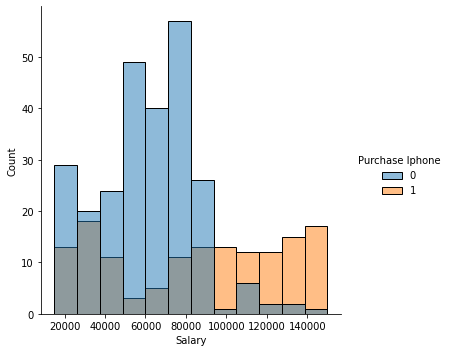

In [17]:
sns.displot(data, x = 'Salary', hue= 'Purchase Iphone')

In [18]:
def euclidean_distance(pt1, pt2):
    distance = np.sqrt(np.sum((pt1-pt2)**2))
    return distance

def KNN(X_train, X_test, Y_train, Y_test, k_val):
    y_hat = []
    
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])), test_pt))
        
        distance_data = pd.DataFrame(data = distances, columns=['distance'], index = Y_train.index)
        
        k_nearest_neighbors_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]
        
        labels = Y_train.loc[k_nearest_neighbors_list.index]
        
        voting = mode(labels).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3 , random_state=42)
y_hat_test = KNN(X_train, X_test, Y_train, Y_test,k_val=3)


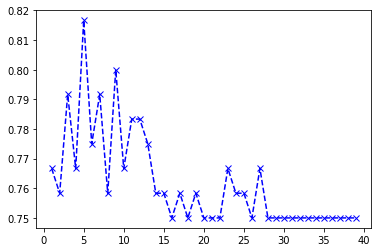

In [20]:
accuracy_vals = []

for i in range(1,40):
    y_hat_test = KNN(X_train, X_test, Y_train, Y_test, k_val=i)
    accuracy_vals.append(accuracy_score(Y_test, y_hat_test))

plt.plot(range(1,40), accuracy_vals, color='blue', linestyle= 'dashed', marker='x')

0.7916666666666666


Text(0.5, 1.0, 'KNN Test Data')

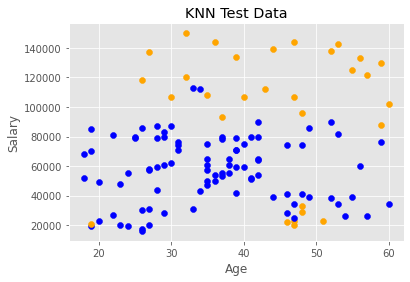

In [24]:
y_hat_test = KNN(X_train, X_test, Y_train, Y_test,k_val=7)
print(accuracy_score(Y_test, y_hat_test))

for i in range(len(y_hat_test)):
    if(y_hat_test[i] == 0):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='blue')
    if(y_hat_test[i] == 1):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color='orange')
        
plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Test Data')

        